# The Relational Algebra in Python

Copyright Jens Dittrich & Marcel Maltry, [Big Data Analytics Group](https://bigdata.uni-saarland.de/), [CC-BY-SA](https://creativecommons.org/licenses/by-sa/4.0/legalcode)

### Imports

In [1]:
from os import listdir
from graphviz import Source

from ra.relation import Relation
from ra.operators_log import *
from ra.operators_phys import *
from ra.utils import load_csv

### Loading Dataset

In [2]:
# Data source: https://relational.fit.cvut.cz/dataset/IMDb
# Information courtesy of IMDb (http://www.imdb.com). Used with permission.
# Notice: The data can only be used for personal and non-commercial use and must not
# be altered/republished/resold/repurposed to create any kind of online/offline
# database of movie information (except for individual personal use).

path = 'data/IMDb_sample'  
# create a list of all files in that directory that end with "*.csv":
files = [file for file in listdir(path) if file.endswith('.csv')]

relations = [load_csv(path + '/' + file, file[:-4], delimiter='\t') for file in files]

relationsDict = {}
for rel in relations:
    relationsDict[rel.name] = rel
print(relationsDict)

{'movies_directors': <ra.relation.Relation object at 0x7f65998acc50>, 'actors': <ra.relation.Relation object at 0x7f65998acdd0>, 'directors': <ra.relation.Relation object at 0x7f65998740d0>, 'movies_genres': <ra.relation.Relation object at 0x7f6599874310>, 'directors_genres': <ra.relation.Relation object at 0x7f6599875e10>, 'movies': <ra.relation.Relation object at 0x7f6599877910>, 'roles': <ra.relation.Relation object at 0x7f6599877f90>}


In [3]:
# build LeafRelation object from relations dictionary
movies_directors = LeafRelation(relationsDict['movies_directors'])
actors = LeafRelation(relationsDict['actors'])
directors = LeafRelation(relationsDict['directors'])
movies_genres = LeafRelation(relationsDict['movies_genres'])
directors_genres = LeafRelation(relationsDict['directors_genres'])
movies = LeafRelation(relationsDict['movies'])
roles = LeafRelation(relationsDict['roles'])

In [4]:
directors.evaluate().print_set()

[directors] : {[id:int, first_name:str, last_name:str]}
{
	(78273, Quentin, Tarantino),
	(43095, Stanley, Kubrick),
	(11652, James (I), Cameron)
}


In [5]:
directors.evaluate().print_latex()

\definecolor{tableheadercolor}{rgb}{0.8,0.8,0.8}\begin{tabular}{|l|l|l|}\hline
\multicolumn{3}{|l|}{\cellcolor{tableheadercolor}{\textbf{directors}}}\\\hline
	\cellcolor{tableheadercolor}{\textbf{id}} & \cellcolor{tableheadercolor}{\textbf{first\textunderscore name}} & \cellcolor{tableheadercolor}{\textbf{last\textunderscore name}} \\
	\hline\hline
	78273 & Quentin & Tarantino \\
	43095 & Stanley & Kubrick \\
	11652 & James (I) & Cameron \\
\hline
\end{tabular}


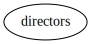

In [6]:
graph = directors.get_graph()
Source(graph)

# Basisoperatoren

## Selection

In [7]:
newmovies =  Selection_ScanBased(movies, 'year>2000')

In [8]:
print(newmovies)

σ_ScanBased[year>2000](movies)


In [9]:
newmovies.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(10934, Aliens of the Deep, 2005, 6.5),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(96779, Earthship.TV, 2001, 5.6),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(159665, Inglorious Bastards, 2006, 8.3),
	(127297, Ghosts of the Abyss, 2003, 6.7)
}


In [10]:
newmovies.evaluate().name

'Result'

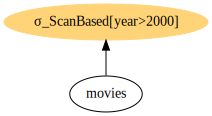

In [11]:
graph = newmovies.get_graph()
Source(graph)

## Projection

In [12]:
exp2 = Projection_ScanBased(newmovies, 'id, year')

In [13]:
print(exp2)

π_ScanBased[id, year](σ_ScanBased[year>2000](movies))


In [14]:
exp2.evaluate().print_set()

[Result] : {[id:int, year:int]}
{
	(96779, 2001),
	(393538, 2003),
	(176712, 2004),
	(176711, 2003),
	(127297, 2003),
	(159665, 2006),
	(105938, 2002),
	(10934, 2005)
}


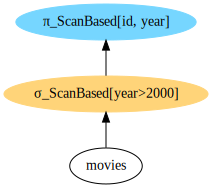

In [15]:
graph = exp2.get_graph()
Source(graph)

## Union

In [16]:
goodmovies = Selection_ScanBased(movies, 'rank>=7.5')
goodOrNew = Union_HashBased(goodmovies, newmovies)

In [17]:
print(goodOrNew)

(σ_ScanBased[rank>=7.5](movies)) ∪ (σ_ScanBased[year>2000](movies))


In [18]:
goodOrNew.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(387728, ER, 1994, 7.7),
	(328285, Terminator, The, 1984, 7.9),
	(267038, Pulp Fiction, 1994, 8.7),
	(164572, Jackie Brown, 1997, 7.5),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(177019, Killing, The, 1956, 8.1),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(121538, Full Metal Jacket, 1987, 8.2),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(159665, Inglorious Bastards, 2006, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, 1964, 8.7),
	(10920, Aliens, 1986, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(310455, Spartacus, 1960, 8.0),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(193519, Lolita, 1962, 7.6),
	(65764, Clockwork Orange, A, 1971, 8.3),
	(10934, Aliens of the Deep, 2005, 6.5),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(30431, Barry Lyndon, 1975, 7.9),
	(96779,

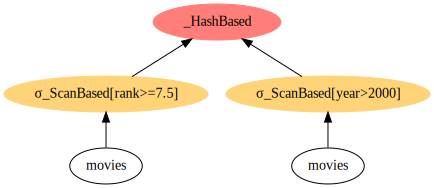

In [19]:
graph = goodOrNew.get_graph()
Source(graph)

Alternatively, without union but with two conditions in the selection instead.

In [20]:
goodOrNewSel = Selection_ScanBased(movies, 'year>2000 or rank>=7.5')

In [21]:
print(goodOrNewSel)

σ_ScanBased[year>2000 or rank>=7.5](movies)


In [22]:
goodOrNewSel.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(387728, ER, 1994, 7.7),
	(328285, Terminator, The, 1984, 7.9),
	(267038, Pulp Fiction, 1994, 8.7),
	(164572, Jackie Brown, 1997, 7.5),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(177019, Killing, The, 1956, 8.1),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(121538, Full Metal Jacket, 1987, 8.2),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(159665, Inglorious Bastards, 2006, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, 1964, 8.7),
	(10920, Aliens, 1986, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(310455, Spartacus, 1960, 8.0),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(193519, Lolita, 1962, 7.6),
	(10934, Aliens of the Deep, 2005, 6.5),
	(65764, Clockwork Orange, A, 1971, 8.3),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(30431, Barry Lyndon, 1975, 7.9),
	(96779,

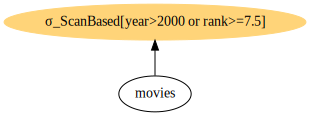

In [23]:
graph = goodOrNewSel.get_graph()
Source(graph)

## Difference


In [24]:
badmovies = Selection_ScanBased(movies, 'rank<7.5')
newGoodMovies = Difference_HashBased(newmovies, badmovies)

In [25]:
print(newGoodMovies)

(σ_ScanBased[year>2000](movies)) − (σ_ScanBased[rank<7.5](movies))


In [26]:
newGoodMovies.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(159665, Inglorious Bastards, 2006, 8.3),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5)
}


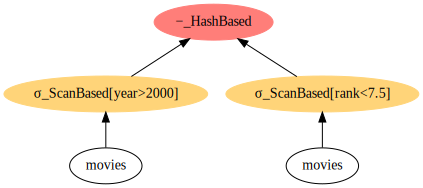

In [27]:
graph = newGoodMovies.get_graph()
Source(graph)

Alternatively, without intersection but with two conditions in the selection instead.

In [28]:
newGoodMoviesSel = Selection_ScanBased(movies, 'year>2000 and not rank<7.5')

In [29]:
newGoodMoviesSel.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(159665, Inglorious Bastards, 2006, 8.3),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5)
}


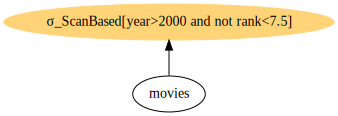

In [30]:
graph = newGoodMoviesSel.get_graph()
Source(graph)

## Cartesian Product

In [31]:
cartesianProduct = Cartesian_Product_NestedLoop(directors, directors_genres)

In [32]:
print(cartesianProduct)

(directors) × (directors_genres)


In [33]:
directors.evaluate().print_set()

[directors] : {[id:int, first_name:str, last_name:str]}
{
	(78273, Quentin, Tarantino),
	(43095, Stanley, Kubrick),
	(11652, James (I), Cameron)
}


In [34]:
directors_genres.evaluate().print_set()

[directors_genres] : {[director_id:int, genre:str, prob:float]}
{
	(43095, Action, 0.0625),
	(11652, Action, 0.5),
	(43095, Short, 0.1875),
	(43095, Adventure, 0.0625),
	(78273, Drama, 0.75),
	(11652, Family, 0.0833333),
	(43095, Sci-Fi, 0.1875),
	(43095, Comedy, 0.125),
	(11652, Sci-Fi, 0.5),
	(11652, Horror, 0.166667),
	(11652, Short, 0.25),
	(43095, Music, 0.0625),
	(78273, Crime, 0.5),
	(78273, Thriller, 0.5),
	(11652, Comedy, 0.0833333),
	(43095, Film-Noir, 0.125),
	(43095, Romance, 0.1875),
	(11652, Drama, 0.25),
	(78273, Mystery, 0.125),
	(43095, Crime, 0.1875),
	(43095, Thriller, 0.1875),
	(78273, Action, 0.5),
	(11652, Adventure, 0.166667),
	(43095, Mystery, 0.0625),
	(43095, Drama, 0.625),
	(43095, War, 0.375),
	(11652, Fantasy, 0.0833333),
	(78273, War, 0.125),
	(43095, Horror, 0.0625),
	(78273, Comedy, 0.25),
	(11652, Documentary, 0.25),
	(43095, Documentary, 0.1875),
	(11652, Thriller, 0.416667),
	(78273, Romance, 0.125),
	(11652, Romance, 0.25)
}


In [35]:
len(directors_genres.evaluate()), len(directors.evaluate())

(35, 3)

In [36]:
print('number of expected tuples in cross product: ', len(directors_genres.evaluate())*len(directors.evaluate()))

number of expected tuples in cross product:  105


In [37]:
cartesianProduct.evaluate().print_set(10)

[Result] : {[id:int, first_name:str, last_name:str, director_id:int, genre:str, prob:float]}
{
	(78273, Quentin, Tarantino, 43095, Short, 0.1875),
	(78273, Quentin, Tarantino, 43095, Horror, 0.0625),
	(78273, Quentin, Tarantino, 43095, Adventure, 0.0625),
	(78273, Quentin, Tarantino, 78273, Action, 0.5),
	(11652, James (I), Cameron, 43095, Adventure, 0.0625),
	(43095, Stanley, Kubrick, 11652, Documentary, 0.25),
	(11652, James (I), Cameron, 11652, Thriller, 0.416667),
	(11652, James (I), Cameron, 43095, Thriller, 0.1875),
	(11652, James (I), Cameron, 11652, Adventure, 0.166667),
	(78273, Quentin, Tarantino, 43095, Comedy, 0.125)
}


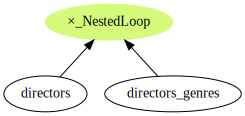

In [38]:
graph = cartesianProduct.get_graph()
Source(graph)

## Renaming Relation

In [39]:
exp11 = Renaming_Relation_ScanBased(goodOrNew, 'good_or_new')

In [40]:
exp11.evaluate().print_set()

[good_or_new] : {[id:int, name:str, year:int, rank:float]}
{
	(387728, ER, 1994, 7.7),
	(328285, Terminator, The, 1984, 7.9),
	(267038, Pulp Fiction, 1994, 8.7),
	(164572, Jackie Brown, 1997, 7.5),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(177019, Killing, The, 1956, 8.1),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(121538, Full Metal Jacket, 1987, 8.2),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(105938, Expedition: Bismarck, 2002, 7.5),
	(159665, Inglorious Bastards, 2006, 8.3),
	(250612, Paths of Glory, 1957, 8.6),
	(127297, Ghosts of the Abyss, 2003, 6.7),
	(92616, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, 1964, 8.7),
	(10920, Aliens, 1986, 8.2),
	(299073, Shining, The, 1980, 8.2),
	(310455, Spartacus, 1960, 8.0),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(193519, Lolita, 1962, 7.6),
	(65764, Clockwork Orange, A, 1971, 8.3),
	(10934, Aliens of the Deep, 2005, 6.5),
	(1711, 2001: A Space Odyssey, 1968, 8.3),
	(30431, Barry Lyndon, 1975, 7.9),
	(9

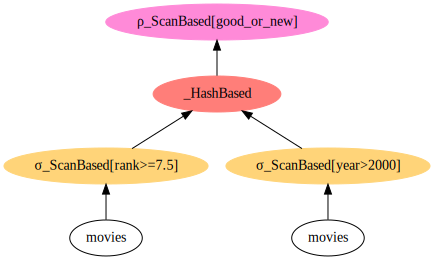

In [41]:
graph = exp11.get_graph()
Source(graph)

## Renaming Attributes

In [42]:
exp12 = Renaming_Attributes_ScanBased(exp11, 'movies<-name, published<-year')

In [43]:
exp12.evaluate().print_set(10)

[Result] : {[id:int, movies:str, published:int, rank:float]}
{
	(387728, ER, 1994, 7.7),
	(328285, Terminator, The, 1984, 7.9),
	(267038, Pulp Fiction, 1994, 8.7),
	(164572, Jackie Brown, 1997, 7.5),
	(328277, Terminator 2: Judgment Day, 1991, 8.1),
	(177019, Killing, The, 1956, 8.1),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(121538, Full Metal Jacket, 1987, 8.2),
	(393538, Jimmy Kimmel Live!, 2003, 6.7),
	(105938, Expedition: Bismarck, 2002, 7.5)
}


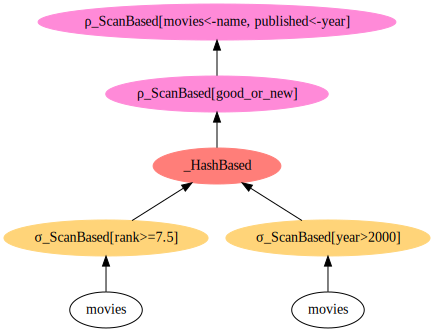

In [44]:
graph = exp12.get_graph()
Source(graph)

# Derived Operators

## Intersection

In [45]:
goodAndNew = Intersection_HashBased(newmovies, goodmovies)

In [46]:
goodAndNew.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(159665, Inglorious Bastards, 2006, 8.3),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5)
}


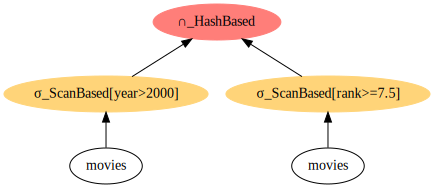

In [47]:
graph = goodAndNew.get_graph()
Source(graph)

Alternatively, without intersection but with two conditions in the selection instead:

In [48]:
goodAndNewSel = Selection_ScanBased(movies, "year>2000 and rank>=7.5")

In [49]:
goodAndNewSel.evaluate().print_set()

[Result] : {[id:int, name:str, year:int, rank:float]}
{
	(159665, Inglorious Bastards, 2006, 8.3),
	(176711, Kill Bill: Vol. 1, 2003, 8.4),
	(176712, Kill Bill: Vol. 2, 2004, 8.2),
	(105938, Expedition: Bismarck, 2002, 7.5)
}


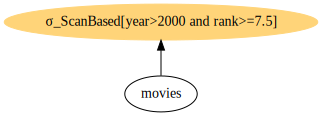

In [50]:
graph = goodAndNewSel.get_graph()
Source(graph)

## Theta Join

In [51]:
directorsAndTheirMovies = Theta_Join_NestedLoop(directors, movies_directors, "id==director_id")

In [52]:
directorsAndTheirMovies.evaluate().print_set()

[Result] : {[id:int, first_name:str, last_name:str, director_id:int, movie_id:int]}
{
	(11652, James (I), Cameron, 11652, 328285),
	(78273, Quentin, Tarantino, 78273, 159665),
	(11652, James (I), Cameron, 11652, 256530),
	(11652, James (I), Cameron, 11652, 10920),
	(43095, Stanley, Kubrick, 43095, 1711),
	(11652, James (I), Cameron, 11652, 96779),
	(78273, Quentin, Tarantino, 78273, 387728),
	(43095, Stanley, Kubrick, 43095, 176891),
	(43095, Stanley, Kubrick, 43095, 177019),
	(78273, Quentin, Tarantino, 78273, 176712),
	(43095, Stanley, Kubrick, 43095, 121538),
	(78273, Quentin, Tarantino, 78273, 223710),
	(43095, Stanley, Kubrick, 43095, 30431),
	(43095, Stanley, Kubrick, 43095, 110246),
	(11652, James (I), Cameron, 11652, 385710),
	(11652, James (I), Cameron, 11652, 127297),
	(43095, Stanley, Kubrick, 43095, 291833),
	(78273, Quentin, Tarantino, 78273, 164572),
	(11652, James (I), Cameron, 11652, 328277),
	(43095, Stanley, Kubrick, 43095, 106666),
	(78273, Quentin, Tarantino, 78273,

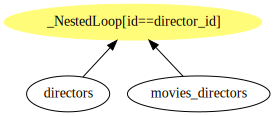

In [53]:
graph = directorsAndTheirMovies.get_graph()
Source(graph)

# Extensions

## Grouping

### Idea
Count the number of female/male actors.
* group by gender
* count the number of actors per group, count(*)

In [54]:
grouping = Grouping_HashBased(actors, 'gender', 'count(*)')

In [55]:
grouping.evaluate().print_set()

[Result] : {[gender:str, count_star:int]}
{
	(M, 802),
	(F, 289)
}


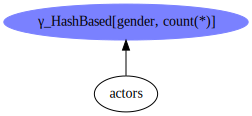

In [56]:
graph = grouping.get_graph()
Source(graph)

In [57]:
#actors.relation.print_set()

In [58]:
grouping2 = Grouping_HashBased(actors, 'first_name,last_name', 'count(*)')

In [59]:
print(grouping2)

(γ_[first_name, last_name, count(*)] (actors)


In [60]:
grouping2.evaluate().print_set()

[Result] : {[first_name:str, last_name:str, count_star:int]}
{
	(Michael (I), Chapman, 1),
	(Tom (I), McDonald, 1),
	(Patrick, Laffan, 1),
	(Johnny, Duncan, 1),
	(Caitlin, Keats, 1),
	(Jim, Sears, 1),
	(Julie, Croft, 1),
	(Samuel L., Jackson, 1),
	(Ronnie Yoshiko, Fujiyama, 1),
	(Gillian Iliana, Waters, 1),
	(Peter, Schrum, 1),
	(Nancy, Fish, 1),
	(Elizabeth, McInerney, 1),
	(Bernard, Hepton, 1),
	(Peter, Edmund, 1),
	(Chris (I), Harris, 1),
	(Quinn Thomas, Kellerman, 1),
	(Bill, Funaro, 1),
	(Thea, Rose, 1),
	(Aston S., Young, 1),
	(Shaun, O'Brien, 1),
	(Sy, Sher, 1),
	(Jesse (II), Baker, 1),
	(Aaron James, Cash, 1),
	(John (V), Wilson, 1),
	(Shay, Duffin, 1),
	(Woody, Strode, 1),
	(Trevor, Steedman, 1),
	(Adam (I), Nelson, 1),
	(Fred, Stadmueller, 1),
	(Ancile, Gloudon, 1),
	(Jack, Creley, 1),
	(Joe, Sawyer, 1),
	(Robin, Hedgeland, 1),
	(Hal J., Moore, 1),
	(Jil, Jarmyn, 1),
	(Aimee, Graham, 1),
	(Hugh, Farrington, 1),
	(Craig, Sams, 1),
	(Lee, Fox, 1),
	(Brian (II), Walsh, 1),
	(Mar

### Idea
* group by year
* count the number of movies per year, count(*)
* sum up the movie ids per year, sum(id)
* compute average movie id per year, avg(id)

The latter two do not make sense but show that multiple aggregations can be computed in one grouping.

In [61]:
grouping = Grouping_HashBased(movies, 'year', 'count(*), sum(id), avg(id)')

In [62]:
grouping.evaluate().print_set()

[Result] : {[year:int, count_star:int, sum_id:int, avg_id:float]}
{
	(1997, 2, 498428, 249214.0),
	(1953, 2, 402079, 201039.5),
	(1992, 1, 276217, 276217.0),
	(1968, 1, 1711, 1711.0),
	(1956, 1, 177019, 177019.0),
	(1978, 1, 369522, 369522.0),
	(1951, 2, 196085, 98042.5),
	(1957, 1, 250612, 250612.0),
	(1989, 1, 5306, 5306.0),
	(1995, 1, 118367, 118367.0),
	(1991, 1, 328277, 328277.0),
	(1994, 3, 995565, 331855.0),
	(1962, 1, 193519, 193519.0),
	(1971, 1, 65764, 65764.0),
	(1980, 1, 299073, 299073.0),
	(2002, 1, 105938, 105938.0),
	(2000, 1, 385710, 385710.0),
	(2006, 1, 159665, 159665.0),
	(1975, 1, 30431, 30431.0),
	(2005, 1, 10934, 10934.0),
	(1964, 1, 92616, 92616.0),
	(1981, 1, 256530, 256530.0),
	(1996, 1, 322652, 322652.0),
	(1955, 1, 176891, 176891.0),
	(2003, 3, 697546, 232515.33333333334),
	(1960, 1, 310455, 310455.0),
	(1999, 1, 106666, 106666.0),
	(1986, 1, 10920, 10920.0),
	(2004, 1, 176712, 176712.0),
	(2001, 1, 96779, 96779.0),
	(1987, 2, 345248, 172624.0),
	(1984, 1, 32

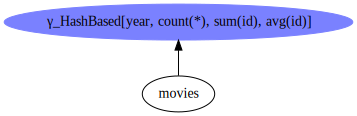

In [63]:
graph = grouping.get_graph()
Source(graph)

# Exercise: Equi-Join

In the following, you should implement the equi join operator in two steps:
1. Complete the implementation of the class `Equi_Join`. This class extends `BinaryOperator` and represents the logical operator equi join. In particular, the logical operator cannot be evaluated.
2. Complete the implementation of the class `Equi_Join_HashBased`. This class extends `Equi_Join` and adds evaluation functionality, i.e. it is a hash-based implemention of a physical operator.

Submit both the cell containing `class Equi_Join` and the cell containing `class Equi_Join_HashBased` in a text document.


## `Equi_Join`

Complete the following method:
* `get_schema()`: Returns the schema of the operator based on its childrens' schemas. You simply have to concatenate the schemas of the operator's children.

In [64]:
# Exercise
# Submit this code cell!
class Equi_Join(BinaryOperator):
    """The relational equi join

    Attributes:
        l_input (:obj: `Operator`): The left input to the equi join operator.
        r_input (:obj: `Operator`): The right input to the equi join operator.
        l_attrs (:obj: `string`): A comma-separated list of left attributes that should be equal.
        r_attrs (:obj: `string`): A comma-separated list of right attributes that should be equal.
    """
    def __init__(self, l_input, r_input, l_attrs, r_attrs):
        # call super constructor, stores child operators
        super().__init__(l_input, r_input)  
        # store list of join attributes in class variable
        self.l_attrs = str_to_list(l_attrs)  
        self.r_attrs = str_to_list(r_attrs)
        # set color and style node for dot graphs
        self.set_dot_attrs({'color':'#FFFC79', 'style': 'filled'})

    def __str__(self):
        """Returns a string representation of the operator tree rooted in this operator."""
        return f'({self.l_input}) ⋈_{{[{", ".join(self.l_attrs)}]}},{{[{", ".join(self.r_attrs)}]}} ({self.r_input})'

    def get_schema(self):
        """Returns the schema of the operator based on its childrens' schemas."""
        l_child_schema = self.l_input.get_schema()
        r_child_schema = self.r_input.get_schema()

        # integrity check (equally named attributes are not allowed here)
        l_attributes = [a for a, _ in l_child_schema]
        r_attributes = [a for a, _ in r_child_schema]
        assert len(set(l_attributes) & set(r_attributes)) == 0

        # Add your code here!
        # ...
        # Return the equi joins' schema. The equi joins' schema is defined as the
        # concatenation of the schema of the left child and the right child.
        pass  # Replace this line.

    def _dot(self, graph, prefix, caption='⋈_{{[{}]}},{{[{}]}}'):
        """Adds a node for the operator into the graph and returns the node's name."""
        # Define unique name within the graph
        node_name = prefix + 'Joi'
        # Fill caption's placeholders to obtain node label
        node_label = caption.format(', '.join(self.l_attrs), ', '.join(self.r_attrs))
        # Call `_dot_helper` to insert new node into graph
        self._dot_helper(graph, prefix, node_name, node_label)
        # Return node's name
        return node_name

### Application

Next, we call the methods that you just implemented. Consider the comments to see whether your implementation produces the expected results.

In [65]:
directors_and_movies = Equi_Join(directors, movies_directors, "id", "director_id")
print(directors_and_movies)

(directors) ⋈_{[id]},{[director_id]} (movies_directors)


In [66]:
schema = directors_and_movies.get_schema()
# This should print the operator's schema:
# [('id', <class 'int'>), ('first_name', <class 'str'>), ('last_name', <class 'str'>),
# ('director_id', <class 'int'>), ('movie_id', <class 'int'>)]
print(schema if schema is not None else "TODO: Implement get_schema().")

TODO: Implement get_schema().


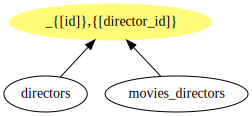

In [67]:
graph = directors_and_movies.get_graph()
Source(graph)

## `Equi_Join_HashBased`

Implement or complete the following methods:
* `_dot()`: Adds a node for the operator into the graph and returns the node's name. You can simply call the corresponding method of the super class' and replace the `caption` parameter.
* `evaluate()`: Returns a relation object containing the operators results. Make sure that your implementation is in O(n) where n is the number of result tuples of `l_input` and `r_input`.

In [68]:
# Exercise
# Submit this code cell!
class Equi_Join_HashBased(Equi_Join):
    def _dot(self, graph, prefix):
        """Adds a node for the operator into the graph and returns the node's name."""
        # Add your code here!
        # ...
        # Use the `_dot` method of the super class and simply overwrite the caption.
        # Inspect implementations of other operators in ra.operators_phys.
        pass

    def __str__(self):
        """Returns a string representation of the operator tree rooted in this operator."""
        return f'({self.l_input}) ⋈_HashBased{{[{", ".join(self.l_attrs)}]}},{{[{", ".join(self.r_attrs)}]}} ({self.r_input})'
    
    def evaluate(self):
        """Returns a relation object containing the operators results."""
        # Add your code here!
        # ...
        # Compute the operator's results. Do not use any other operators as subroutines!
        # Make sure that your implementation is in O(n) where n is the number of result
        # tuples of l_input and r_input.
        pass

### Application

Next, we call the methods that you just implemented. Consider the comments to see whether your implementation produces the expected results.

In [69]:
directors_and_movies = Equi_Join_HashBased(directors, movies_directors, "id", "director_id")
print(directors_and_movies)

(directors) ⋈_HashBased{[id]},{[director_id]} (movies_directors)


In [70]:
graph = directors_and_movies.get_graph()
# This should display the operator tree. The tree looks similar to the one above except that the label should
# also contain "HashBased".
Source(graph)

In [71]:
result = directors_and_movies.evaluate()
# This should print (part of) the result of the operator tree, order may vary depending on implementation:
# [(directors) ⋈_HashBased{[id]},{[director_id]} (movies_directors)] : {[id:int, first_name:str, last_name:str, director_id:int, movie_id:int]}
# {
#     (11652, James (I), Cameron, 11652, 256530),
#     (78273, Quentin, Tarantino, 78273, 276217),
#     (43095, Stanley, Kubrick, 43095, 116239)
#     WARNING: skipping 37 out of 40 tuples...
# }
if result is not None:
    result.print_set(3)
else:
    print("TODO: Implement evaluate().")

TODO: Implement evaluate().


## Testing

Finally, the unit test below helps you test whether your implementation of `evaluate()` works on some small examples. Note that this unit test only checks functional correctness. In particular, it does not check whether your implementation of `evaluate()` performs evaluation in O(n).

In [72]:
import unittest

class EquiJoinTest(unittest.TestCase):
    
    def test_evaluate(self):
        # set up two relations to join
        foo = Relation('foo', [('fid', int), ('name', str), ('bar_id', int)])
        foo.add_tuple( (1, 'first',  3) )
        foo.add_tuple( (2, 'second', 2) )
        foo.add_tuple( (3, 'third',  1) )
        foo.add_tuple( (4, 'fourth', 1) )
        rel_foo = LeafRelation(foo)
        
        bar = Relation('bar', [('bid', int), ('string', str), ('attr', int)])
        bar.add_tuple( (1, 'fourth',  42) )
        bar.add_tuple( (2, 'second',  99) )
        bar.add_tuple( (3, 'first',    0) )
        rel_bar = LeafRelation(bar)
        
        # join name=string
        with self.subTest(msg='name=string'):
            l_attrs='name'
            r_attrs='string'
            eq = Equi_Join_HashBased(rel_foo, rel_bar, l_attrs, r_attrs)
            res = eq.evaluate()
            
            self.assertEqual(len(res), 3)  # result contains 2tuples
            self.assertEqual(len(list(res.tuples)[0]), 6)  # result tuples have 6 attributes
            self.assertTrue((2, 'second', 2, 2, 'second', 99) in res.tuples)
            self.assertTrue((1, 'first',  3, 3, 'first',   0) in res.tuples)
            self.assertTrue((4, 'fourth', 1, 1, 'fourth', 42) in res.tuples)
            
        # join bar_id=bid
        with self.subTest(msg='bar_id=bid'):
            l_attrs='bar_id'
            r_attrs='bid'
            eq = Equi_Join_HashBased(rel_foo, rel_bar, l_attrs, r_attrs)
            res = eq.evaluate()
        
            self.assertEqual(len(res), 4)  # result contains 4 tuples
            self.assertEqual(len(list(res.tuples)[0]), 6)  # result tuples have 6 attributes
            self.assertTrue((1, 'first',  3, 3, 'first',   0) in res.tuples)
            self.assertTrue((2, 'second', 2, 2, 'second', 99) in res.tuples)
            self.assertTrue((3, 'third',  1, 1, 'fourth', 42) in res.tuples)
            self.assertTrue((4, 'fourth', 1, 1, 'fourth', 42) in res.tuples)
        
        # join bar_id=bid and name=string
        with self.subTest(msg='bar_id=bid and name=string'):
            l_attrs='bar_id, name'
            r_attrs='bid, string'
            eq = Equi_Join_HashBased(rel_foo, rel_bar, l_attrs, r_attrs)
            res = eq.evaluate()
            
            self.assertEqual(len(res), 3)  # result contains 2tuples
            self.assertEqual(len(list(res.tuples)[0]), 6)  # result tuples have 6 attributes
            self.assertTrue((1, 'first',  3, 3, 'first',   0) in res.tuples)
            self.assertTrue((2, 'second', 2, 2, 'second', 99) in res.tuples)
            self.assertTrue((4, 'fourth', 1, 1, 'fourth', 42) in res.tuples)

In [73]:
# Run the unit test without shutting down the jupyter kernel
unittest.main(argv=['ignored', '-v'], verbosity=2, exit=False)

test_evaluate (__main__.EquiJoinTest) ... 
ERROR: test_evaluate (__main__.EquiJoinTest) [name=string]
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-72-5f8cb6f2cf49>", line 27, in test_evaluate
    self.assertEqual(len(res), 3)  # result contains 2tuples
TypeError: object of type 'NoneType' has no len()

ERROR: test_evaluate (__main__.EquiJoinTest) [bar_id=bid]
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-72-5f8cb6f2cf49>", line 40, in test_evaluate
    self.assertEqual(len(res), 4)  # result contains 4 tuples
TypeError: object of type 'NoneType' has no len()

ERROR: test_evaluate (__main__.EquiJoinTest) [bar_id=bid and name=string]
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-72-5f8cb6f2cf49>", line 54, in test_evaluate
    self.assertEqua